<a href="https://colab.research.google.com/github/BT21PrKu/Matrix-Multiplication-Using-Multi-Threading/blob/main/Matrix_Multiplication_Using_Multi_Threading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import threading
import time
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
numberofcores = multiprocessing.cpu_count()

In [33]:
num_matrices = 100
matrix_size = 1000
num_threads = [1, 2, 3, 4, 5, 6, 7]

In [34]:
def matrix_multiply(A, B):
    return np.matmul(A, B)


def generate_random_matrix(rows, cols):
    return np.random.rand(rows, cols)


constant_matrix = generate_random_matrix(matrix_size, matrix_size)


# Function to execute matrix multiplication in a thread
def worker(matrices, constant_matrix, results, start_index, end_index):
    for i in range(start_index, end_index):
        results[i] = matrix_multiply(matrices[i], constant_matrix)

In [35]:
# precompute kardiya so that benchmark ke liye sahi ho
matrices = [
    generate_random_matrix(matrix_size, matrix_size) for _ in range(num_matrices)
]

times = []
for num_thread in num_threads:
    start_time = time.time()

    # Create threads
    results = [None] * num_matrices
    threads = []
    chunk_size = num_matrices // num_thread

    for i in range(num_thread):
        start_index = i * chunk_size
        end_index = start_index + chunk_size
        if i == num_thread - 1:
            end_index = num_matrices
        thread = threading.Thread(
            target=worker,
            args=(matrices, constant_matrix, results, start_index, end_index),
        )
        threads.append(thread)
        thread.start()

    # Wait for threads to finish
    for thread in threads:
        thread.join()

    end_time = time.time()
    times.append(end_time - start_time)

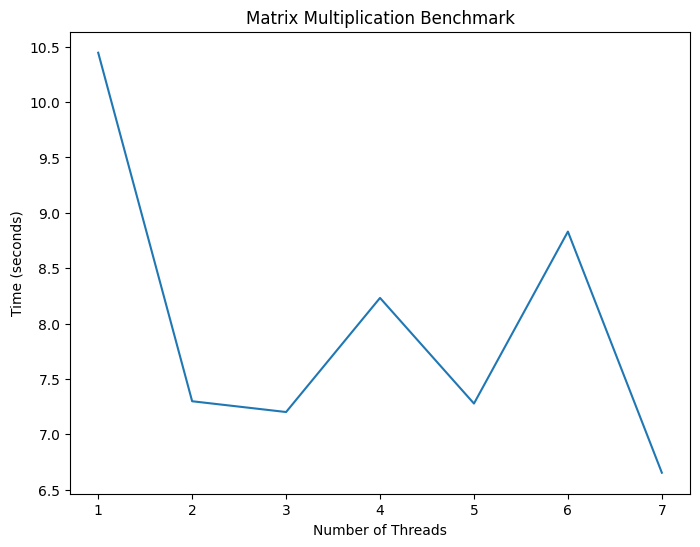

In [36]:
# Plot results
plt.figure(figsize=(8, 6))
plt.plot(num_threads, times)
plt.xlabel("Number of Threads")
plt.ylabel("Time (seconds)")
plt.title("Matrix Multiplication Benchmark")
plt.show()


In [37]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Number of Threads': num_threads,
    'Time Taken (seconds)': times
})

# Print DataFrame
print("Results DataFrame:")
print(results_df)

# Save DataFrame to CSV file
results_df.to_csv('time_vs_threads.csv', index=False)

print("\nResults saved to 'time_vs_threads.csv'")

Results DataFrame:
   Number of Threads  Time Taken (seconds)
0                  1             10.445544
1                  2              7.298105
2                  3              7.200712
3                  4              8.231264
4                  5              7.277420
5                  6              8.830194
6                  7              6.652607

Results saved to 'time_vs_threads.csv'


In [39]:
![cpu_usage]

/bin/bash: line 1: [cpu_usage]: command not found
